In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 4.4MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


# Lecture 6: Euler's method

[Euler's method](https://en.wikipedia.org/wiki/Euler_method) for solving differential equations works by discretizing time and incrementing the function step by step. Assuming that we have a differential equation of the form

$$ \frac{d x}{d t} = f(x, t)\, $$

we can integrate this numerically with Euler's method by breaking time into small segments $\Delta t$ and iteratively computing

$$ x(t + \Delta t) = x(t) + \Delta t \times f(x, t) + \mathcal{O}\left(\Delta t\right)^2\,.$$

**Exercise**: Let's write a function to numerically integrate a differential equation using Euler's method.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the integration function using Euler's method below

def integrate(f, x0, a, b, n_steps):
  
    dt = (b - a)/n_steps

    # Check to make sure dt is what we expect
    # NOTE: for more info on string formatting, see: https://pyformat.info/
    print('The time step is {}'.format(dt))
    
    times  = np.arange(a, b+dt, dt)
    x_vals = []
    
    # Are the time and x values what we anticipated?
    print('The time values are {}'.format(times))
    print('Current x values are {}'.format(x_vals))
  
    x = x0
  
    for t in times:
        x_vals.append(x)
        x = x + (dt * f(x, t))
        
        # Check to see how x has updated, and x values
        print('At t={} we found x={}'.format(t, x))
        print('Current x values are {}'.format(x_vals))

    # Check the final values before we return them
    print('') # This just prints a blank line, which can help spacing
    print('The final time values are {}'.format(times))
    print('The final x values are {}'.format(x_vals))
    
    return x_vals, times

In [7]:
np.cos(0, 1)

TypeError: ignored

In [5]:
def g(x, t):
    return x

integrate(g, 1, 0, 10, 10)

The time step is 1.0
The time values are [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Current x values are []
At t=0.0 we found x=2.0
Current x values are [1]
At t=1.0 we found x=4.0
Current x values are [1, 2.0]
At t=2.0 we found x=8.0
Current x values are [1, 2.0, 4.0]
At t=3.0 we found x=16.0
Current x values are [1, 2.0, 4.0, 8.0]
At t=4.0 we found x=32.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0]
At t=5.0 we found x=64.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0]
At t=6.0 we found x=128.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]
At t=7.0 we found x=256.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
At t=8.0 we found x=512.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0]
At t=9.0 we found x=1024.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]
At t=10.0 we found x=2048.0
Current x values are [1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0]

The final time valu

([1, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0, 1024.0],
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

### Visualizing Euler's method in a simple case

Now, let's plot the result for the differential equation

$$ \frac{dx}{dt} = -x^3 + 0.1\,.$$

What do you expect the result will be if we start with $x(0) = 0$? We'll integrate from $t=0$ to $t=10$.

0.4641588833612779


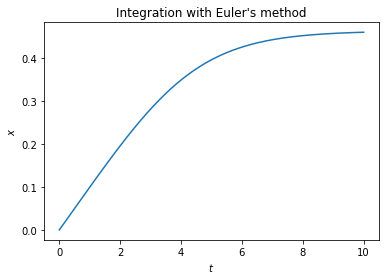

In [13]:
# Define the function and perform the integration

def g(x, t):
    return -(x**3) + 0.1

x, t = integrate(g, 0, 0, 10, 1000)

print(0.1**(1/3))

sns.lineplot(t, x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title("Integration with Euler's method");

### Unphysicial results

What happens if we choose a very small number of steps? For example, we could set $n=3$. What other choices would give poor results?

This is a very simple example of a phenomenon known as **[stiffness](https://en.wikipedia.org/wiki/Stiff_equation)**, which can pose a challenge for numerical differential equation solvers. We need to be especially wary when considering differential equations for multiple variables that have large differences in parameter sizes, or when some terms in the differential equation can grow very large with small shifts in the variables.

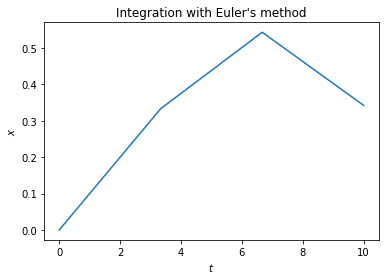

In [15]:
# Try different values here -- what explains this behavior?

def g(x, t):
    return -x**3 + 0.1

x, t = integrate(g, 0, 0, 10, 3)

sns.lineplot(t, x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title("Integration with Euler's method");

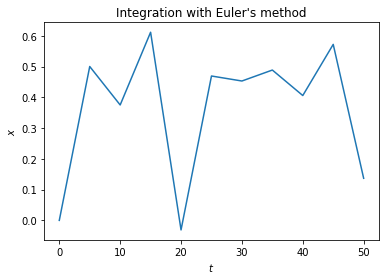

In [16]:
def g(x, t):
    return -x**3 + 0.1

x, t = integrate(g, 0, 0, 50, 10)

sns.lineplot(t, x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title("Integration with Euler's method");























### Further checks on the expected behavior

Consider different starting points for the differential equations. Do these all reach the same result?

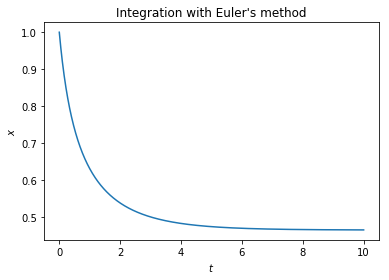

In [17]:
# Test different starting conditions here

def g(x, t):
    return -x**3 + 0.1

x, t = integrate(g, 1, 0, 10, 1000)

sns.lineplot(t, x)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title("Integration with Euler's method");